In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import metrics
import seaborn as sb

In [2]:
df = pd.read_csv('framingham.csv')
df.head(10)

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
df=df.drop(["gender","currentSmoker","BPMeds","prevalentHyp","diabetes","TenYearCHD"],axis=1)

In [4]:
df.head(5)

,age,cigsPerDay,prevalentStroke,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20,0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30,0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23,0,285.0,130.0,84.0,23.10,85.0,85.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4238 non-null   int64  
 1   cigsPerDay       4238 non-null   int64  
 2   prevalentStroke  4238 non-null   int64  
 3   totChol          4188 non-null   float64
 4   sysBP            4238 non-null   float64
 5   diaBP            4238 non-null   float64
 6   BMI              4219 non-null   float64
 7   heartRate        4237 non-null   float64
 8   glucose          3850 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 298.1 KB


In [6]:
df.describe()

,age,cigsPerDay,prevalentStroke,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003067,0.005899,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.879230,0.076587,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [7]:
print(df.isnull().sum(),sep='\n')

age                  0
cigsPerDay           0
prevalentStroke      0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64


In [8]:
df['totChol'].fillna(236.721585,inplace=True)
df['BMI'].fillna(25.802008,inplace=True)
df['heartRate'].fillna(75.878924,inplace=True)
df['glucose'].fillna(81.966753,inplace=True)

In [9]:
column_to_move = df.pop("prevalentStroke")
df.insert(8, "prevalentStroke", column_to_move)
df.head(5)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,prevalentStroke
0,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30,225.0,150.0,95.0,28.58,65.0,103.0,0
4,46,23,285.0,130.0,84.0,23.10,85.0,85.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb5d4bd1d0>,
      dtype=object)

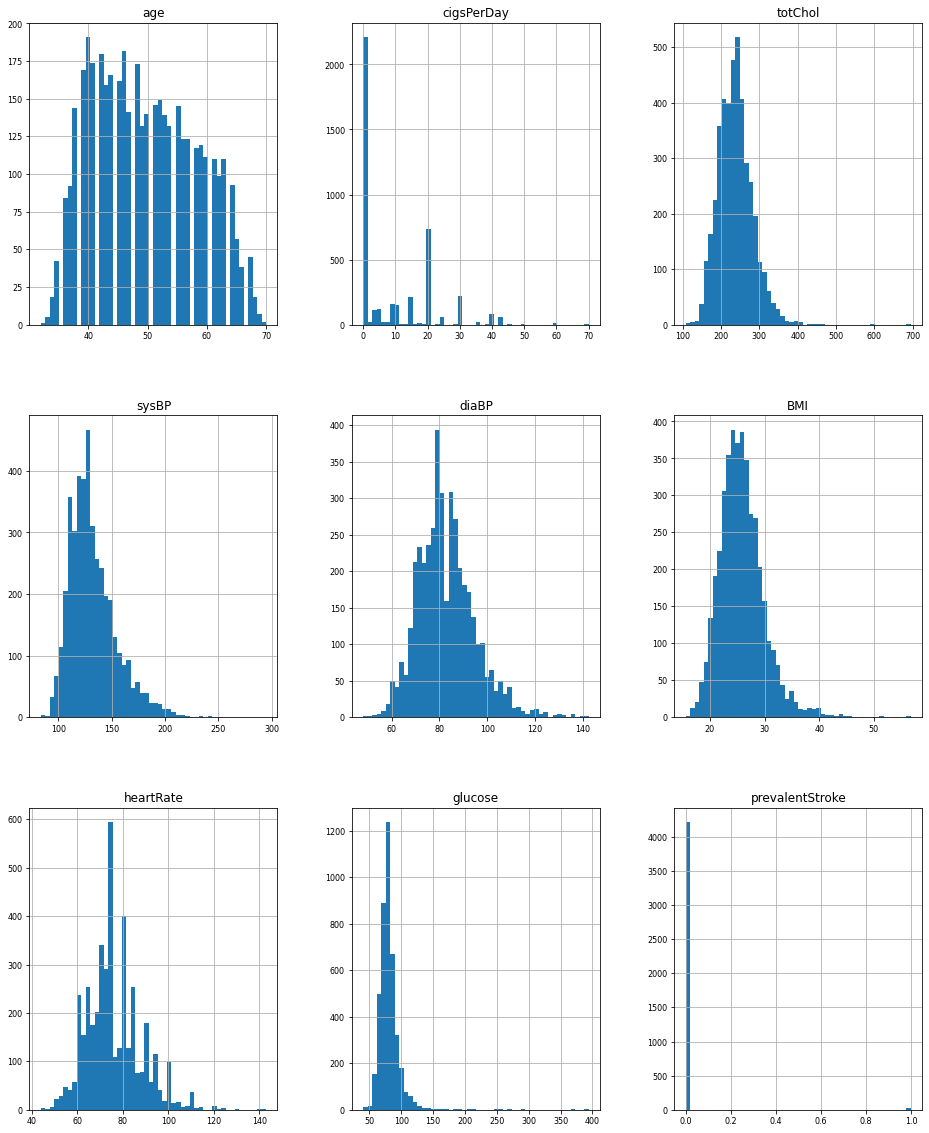

In [10]:
#Histogram of the features
#
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

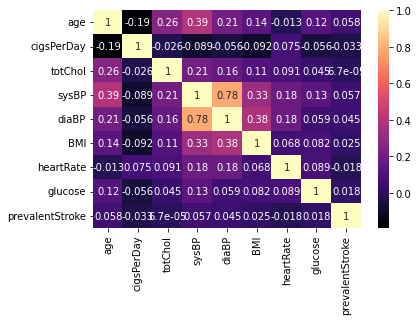

In [11]:
#Correlations
sb.heatmap(df.corr(), annot = True, cmap = "magma")

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,8]

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.30, random_state= 8)

**Logistic** **Regression**

In [13]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_train = lg.predict(X_train) # predict the labels of training set
acc_train = accuracy_score(y_train, y_pred_train) # calculate the training accuracy

y_pred_val = lg.predict(X_val) # predict the labels of validation set
acc_val = accuracy_score(y_val, y_pred_val) # calculate the validation accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
logloss_train = metrics.log_loss(y_train, y_pred_train)
logloss_val = metrics.log_loss(y_val, y_pred_val)
print(logloss_train,logloss_val )

0.17465879340030782 0.30565288845053795


In [15]:
print("\ntraining accuracies:\n",acc_train)
print('\n')
print("validation accuracies:\n",acc_val)


training accuracies:
 0.9949431099873578


validation accuracies:
 0.9911504424778761


In [47]:
y_pred_test = lg.predict(X_test) # predict the labels of testing set
acc_test = accuracy_score(y_test, y_pred_test) # calculate the testing accuracy
print(acc_test)

0.9952830188679245


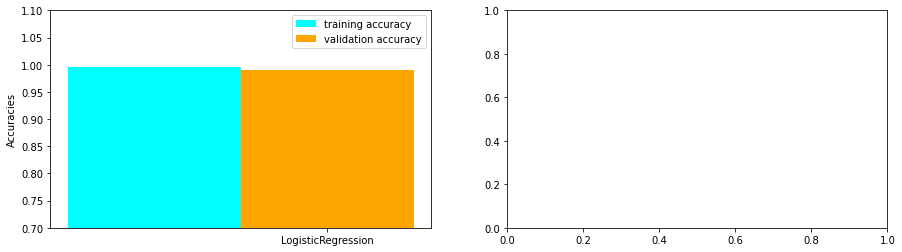

In [16]:
# plot results
fig, axes = plt.subplots(1,2,figsize=(15,4))
x = np.arange(1)
y1 = acc_train
y2 = acc_val
width = 0.2

axes[0].bar(x-0.2, y1, width, color='cyan')
axes[0].bar(x, y2, width, color='orange')
axes[0].set_ylim(0.7, 1.1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["LogisticRegression"])
axes[0].set_ylabel("Accuracies")
axes[0].legend(["training accuracy", "validation accuracy"])

X_fit = np.linspace(-22, 22, 100)




The Accuracy score for Logistic Regression Model is: 99.5%
The f1 score for Logistic Regression Model is: 0.0%
The precision for Logistic Regression Model is: 0.0%
The sensitivity for Logistic Regression Model is: 0.0%
Confusion Matrix: 
 [[844   0]
 [  4   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


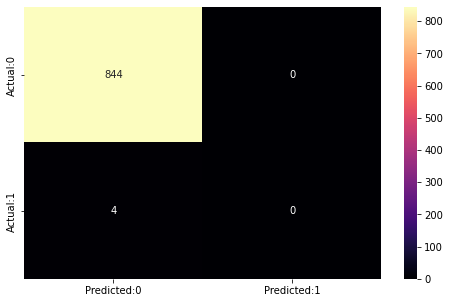

In [17]:
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
# Accuracy of Model 
model_lg_pred = lg.predict(X_test)
acc_lr = accuracy_score(y_test, model_lg_pred)
print(f"The Accuracy score for Logistic Regression Model is: {round(acc_lr,3)*100}%")

# F1 Score
f1_lr = f1_score(y_test, model_lg_pred)
print(f"The f1 score for Logistic Regression Model is: {round(f1_lr, 3)*100}%")

# Precision Score
prec_lr = precision_score(y_test, model_lg_pred)
print(f"The precision for Logistic Regression Model is: {round(prec_lr, 3)*100}%")

# Recall/ Sensitivity
recall_lr = recall_score(y_test, model_lg_pred)
print(f"The sensitivity for Logistic Regression Model is: {round(recall_lr, 3)*100}%")

# Confusion Matrix for test
confmat_lr = confusion_matrix(y_test, model_lg_pred)
print(f"Confusion Matrix:", "\n", confmat_lr)

# Plotting Confusion Matrix
conf_matrix_lr = pd.DataFrame(data=confmat_lr,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_lr), annot = True, cmap = "magma", fmt = "g")

In [18]:
#Logistic regression from scratch along with log loss computation 
lr = 0.06
import random
# Parameters initialization
weights = np.random.normal(0, 0.1, 8)
biais = random.normalvariate(0, 0.1)

m = X_train.shape[0]
for epoch in range(1000):

    # Forward pass
    Z = np.dot(X_train, weights) + biais
    A = 1 / (1 + np.exp(-Z))
    #Loss Computation
    J = np.sum(-(y_train * np.log(A) + (1 - y_train) * np.log(1 - A))) / m

    # Gradient computation
    dZ = A - y_train
    dw = np.dot(dZ, X_train) / m
    db = np.sum(dZ) / m

    # Update weights
    weights = weights - lr * dw
    biais = biais - lr * db
    
    if epoch % 10 == 0:
        print("epoch %s - loss %s" % (epoch, J))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


epoch 0 - loss inf
epoch 10 - loss inf
epoch 20 - loss inf
epoch 30 - loss inf
epoch 40 - loss inf
epoch 50 - loss inf
epoch 60 - loss inf
epoch 70 - loss inf
epoch 80 - loss inf
epoch 90 - loss inf
epoch 100 - loss inf
epoch 110 - loss inf
epoch 120 - loss inf
epoch 130 - loss inf
epoch 140 - loss inf
epoch 150 - loss inf
epoch 160 - loss inf
epoch 170 - loss inf
epoch 180 - loss 1.7353063321542592
epoch 190 - loss inf
epoch 200 - loss inf
epoch 210 - loss 0.3197386671818308
epoch 220 - loss 0.37203381724241275
epoch 230 - loss 0.34644847988290667
epoch 240 - loss 0.27275118237425794
epoch 250 - loss inf
epoch 260 - loss 2.4221824555512996
epoch 270 - loss 0.8730179808159463
epoch 280 - loss inf
epoch 290 - loss inf
epoch 300 - loss inf
epoch 310 - loss inf
epoch 320 - loss inf
epoch 330 - loss inf
epoch 340 - loss inf
epoch 350 - loss inf
epoch 360 - loss inf
epoch 370 - loss inf
epoch 380 - loss inf
epoch 390 - loss inf
epoch 400 - loss inf
epoch 410 - loss inf
epoch 420 - loss inf


**Decision** **Tree** **Classifier** 

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
grid_param = {
'criterion': ['gini', 'entropy'],
'max_depth' : range(2,32,1),
'min_samples_leaf' : range(1,10,1),
'min_samples_split': range(2,10,1),
'splitter' : ['best', 'random']
}

In [35]:
clf = DecisionTreeClassifier()

In [36]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [37]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [38]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [39]:
grid_search.best_score_

0.9949438152342884

In [40]:
dt_clf = DecisionTreeClassifier(criterion = 'gini',max_depth =24, min_samples_leaf= 1, min_samples_split= 2, random_state=0)

In [41]:
dt_clf.fit(X_train, y_train)
y_pred_train_dt = dt_clf.predict(X_train)
acc_train_dt = accuracy_score(y_train, y_pred_train_dt)

y_pred_val_dt = lg.predict(X_val) # predict the labels of validation set
acc_val_dt = accuracy_score(y_val, y_pred_val_dt) # calculate the validation accuracy


In [42]:
print("\ntraining accuracies:\n",acc_train_dt)
print('\n')
print("validation accuracies:\n",acc_val_dt)


training accuracies:
 1.0


validation accuracies:
 0.9911504424778761


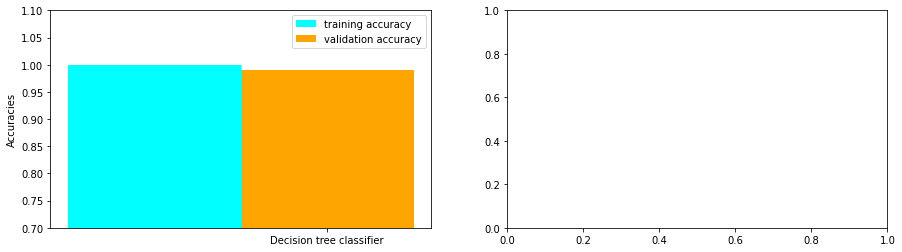

In [43]:
# plot results
fig, axes = plt.subplots(1,2,figsize=(15,4))
x = np.arange(1)
y1 = acc_train_dt
y2 = acc_val_dt
width = 0.2

axes[0].bar(x-0.2, y1, width, color='cyan')
axes[0].bar(x, y2, width, color='orange')
axes[0].set_ylim(0.7, 1.1)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["Decision tree classifier"])
axes[0].set_ylabel("Accuracies")
axes[0].legend(["training accuracy", "validation accuracy"])

X_fit = np.linspace(-22, 22, 100)

The Accuracy score for Logistic Regression Model is: 99.1%
The f1 score for Logistic Regression Model is: 0.0%
The precision for Logistic Regression Model is: 0.0%
The sensitivity for Logistic Regression Model is: 0.0%
Confusion Matrix: 
 [[840   4]
 [  4   0]]


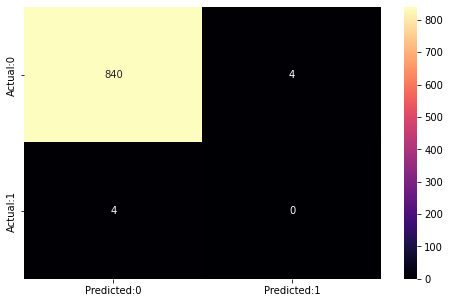

In [23]:
# Accuracy of Model 
model_dt_pred = dt_clf.predict(X_test)
acc_lr = accuracy_score(y_test, model_dt_pred)
print(f"The Accuracy score for Logistic Regression Model is: {round(acc_lr,3)*100}%")

# F1 Score
f1_lr = f1_score(y_test, model_dt_pred)
print(f"The f1 score for Logistic Regression Model is: {round(f1_lr, 3)*100}%")

# Precision Score
prec_lr = precision_score(y_test, model_dt_pred)
print(f"The precision for Logistic Regression Model is: {round(prec_lr, 3)*100}%")

# Recall/ Sensitivity
recall_lr = recall_score(y_test, model_dt_pred)
print(f"The sensitivity for Logistic Regression Model is: {round(recall_lr, 3)*100}%")

# Confusion Matrix for test
confmat_lr = confusion_matrix(y_test, model_dt_pred)
print(f"Confusion Matrix:", "\n", confmat_lr)

# Plotting Confusion Matrix
conf_matrix_lr = pd.DataFrame(data=confmat_lr,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sb.heatmap(pd.DataFrame(conf_matrix_lr), annot = True, cmap = "magma", fmt = "g")

In [44]:
dt_clf.score(X_test,y_test)

0.9834905660377359

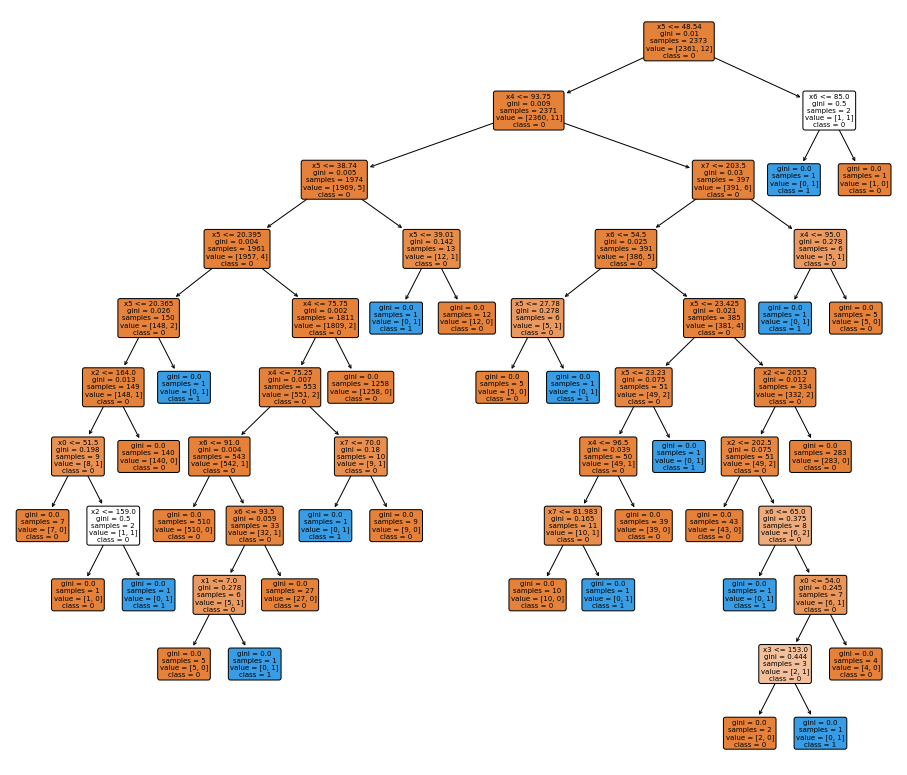

In [45]:
from sklearn.tree import plot_tree

feature_cols = ["x" + str(i) for i in range(8)] # needed for visualization
label_names = ['0', '1']

# Visualize the decision tree
plt.figure(figsize=(16,14))
plot_tree(dt_clf, filled=True, rounded=True, feature_names=feature_cols, class_names=label_names)
plt.show()